# Shreyas Bhatt

# Milestone 2

## Interests

Some of the aspects of what I am interested in are as follows
- How do the ratings of an app affect how many downloads it gets.
- What is the relationship between the content rating of an app and how many downloads it has.
- How does the size of the app determine how many downloads it gets.

In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/google_play_store.csv')

# Milestone 3

### Research interest
I decided to focus upon the content rating of my data sets and look into how other variables in the dataset affect it.
I suspect that apps that are paid may be rated better, or apps that have more downloads and popularity may be higher rated overall.

## Task 1: Exploratory Data Analysis

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
dfcolumns = list(df.columns)
print(f"Columns: {dfcolumns}")
print(f"Number of columns: {len(dfcolumns)}")

Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
Number of columns: 13


As shown, there were 13 columns within our chosen dataset: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, 
Last Updated, Current Version, and Android Ver. Before proceeding, I decided to investigate a few other aspects of my data.

In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [6]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

As illustrated above, our dataset chosen has 10841 rows. 
For this project, I decided to focus particularly upon how the ratings of an app and how that affects other parameters.
Therefore, what is relevent is that there are some irregular entries (objects) within both Rating and installs columns which needs rectification.
Before proceeding, I decided to look into some statistical valuies of these two aspects.

In [7]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [8]:
df['Reviews'].describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

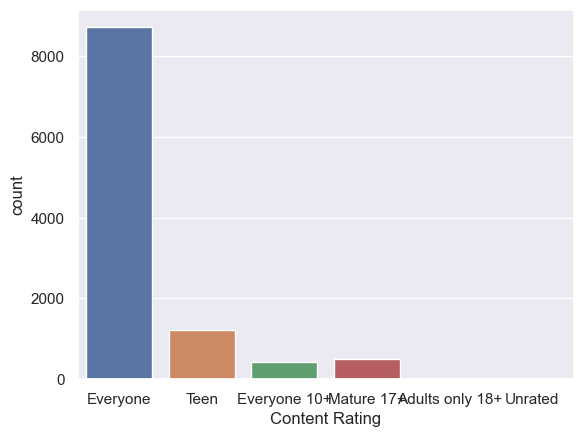

In [9]:
import seaborn as sns
sns.set()
sns.countplot(data=df, x= 'Content Rating')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

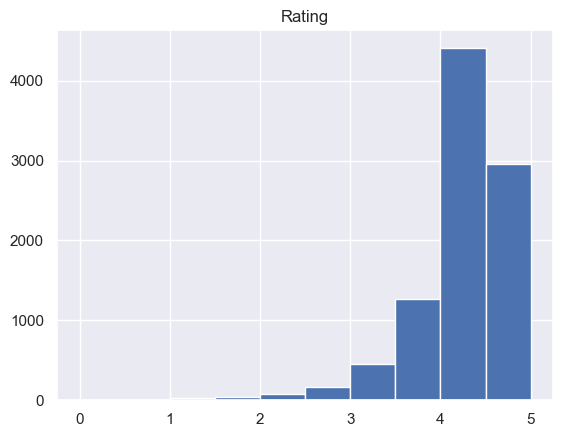

In [10]:
df.hist(column= "Rating", range=[0 ,5])

<AxesSubplot:xlabel='Type', ylabel='count'>

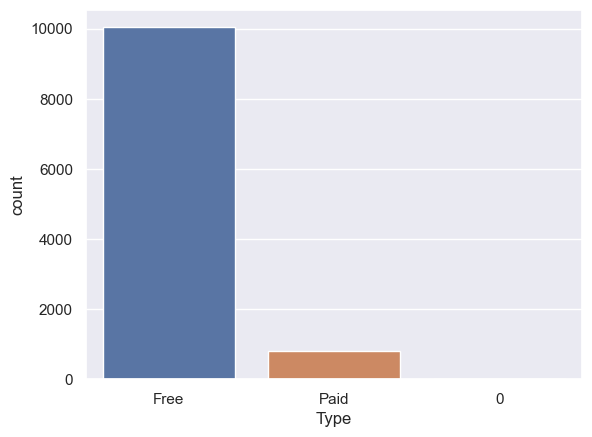

In [11]:
sns.countplot(data=df, x= 'Type')

I thought that there would be a relatively 50/50 split with 5 star and 1 star ratings when it came to how people rated apps although it seems like most people 
rate apps relatively highly with little standard deviation. Although an entry of rating 19 does seem odd  considering 5 being the highest and further illustrates the need for data cleaning.
Unsurprisingly, most apps on the google play store are meant for everyone and are free as well.

I am unable to plot and understand the installs section.
This is because Reviews is currently expressed as an object in the dataframe and must be converted to an integer for analysis. This will be done in the following task.
The Rating graphs do work because they are a float.
The graphs show a distinct lack of spread as previously also observable from the statistics.

## Task 2: Analysis Pipeline

In [12]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/google_play_store.csv')

In [13]:
df = df.drop(["Price", "Category","Current Ver","Android Ver", "Last Updated"],axis=1)
df = df.dropna()
df = df.reset_index()

I dropped some columns that I felt were no longer directly relevent to my investigation anymore.

In [14]:
#Expressing size in terms of megabytes. If size entry is not a number, it is disregarded. Also renamed and converted.
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].astype(float)
df = df.rename(columns = {'Size':'Size MB'})

#Converting reviews to numeric and renaming to avoid ambiguity
df['Reviews'] = df['Reviews'].astype(float)
df = df.rename(columns = {'Reviews':'No. of reviews'})

#Similar process for installs, need to disregard alternative non numerical entries. Also renamed to Downloads for avoiding ambiguity
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].astype(float)
df = df.rename(columns = {'Installs':'Downloads'})

# Removing all ratings that are below 1*(lowest possible) or above 5*(highest possible)
indexName = df[ (df['Rating'] < 1) & (df['Rating'] > 5) ].index
df.drop(indexName , inplace=True)

#Renaming Content Rating--> Audience
df = df.rename(columns = {'Content Rating':'Audience'})

#Resetting Index 
df = df.reset_index()

df.head()

,level_0,index,App,Rating,No. of reviews,Size MB,Downloads,Type,Audience,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19.0,10000.0,Free,Everyone,Art & Design
1,1,1,Coloring book moana,3.9,967.0,14.0,500000.0,Free,Everyone,Art & Design;Pretend Play
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0,8.7,5000000.0,Free,Everyone,Art & Design
3,3,3,Sketch - Draw & Paint,4.5,215644.0,25.0,50000000.0,Free,Teen,Art & Design
4,4,4,Pixel Draw - Number Art Coloring Book,4.3,967.0,2.8,100000.0,Free,Everyone,Art & Design;Creativity


Data has now been processed. 

## Task 3: Method Chaining

In [15]:
## This in the .py file
#import pandas as pd
#import numpy as np
#import seaborn as sb

# We had asked the prof and he said we could use these steps because we could not convert
#some steps properly

#Method Chain 1
#df = (
 #   pd.read_csv('../data/raw/google_play_store.csv')
 #   .drop(["Price", "Category","Current Ver","Android Ver", "Last Updated"],axis=1)
 #   .dropna()
#    .reset_index()
#)

#df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
#df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
#df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
#df['Size'] = df['Size'].astype(float)
#df['Reviews'] = df['Reviews'].astype(float)

#Method Chain 2
#df1 = (
#    df
#    .rename(columns = {'Size':'Size MB'})
#    .rename(columns = {'Reviews':'No. of reviews'})
#)
#
#df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
#df1['Installs'] = df1['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
#df1['Installs'] = df1['Installs'].astype(float)
#indexName = df1[ (df1['Rating'] < 1) & (df1['Rating'] > 5) ].index

#Method Chain 3
#df2 = (
#    df1
#)

#df2 = df2.rename(columns = {'Installs':'Downloads'})
#df2 = df2.drop(indexName)`
#df2 = df2.rename(columns = {'Content Rating':'Audience'})
#df2 = df2.reset_index()
#df2.head()

`import project_functions3`\
`df = project_functions3.load_and_process('../data/raw/google_play_store.csv')` \
`df`

## Task 4: Research Question Analysis

Now that the data has been adecuately cleaned, we may commence an indepth analysis of how User Ratings of an app correlate with it's other aspects.

In [16]:
df.head()

,level_0,index,App,Rating,No. of reviews,Size MB,Downloads,Type,Audience,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159.0,19.0,10000.0,Free,Everyone,Art & Design
1,1,1,Coloring book moana,3.9,967.0,14.0,500000.0,Free,Everyone,Art & Design;Pretend Play
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510.0,8.7,5000000.0,Free,Everyone,Art & Design
3,3,3,Sketch - Draw & Paint,4.5,215644.0,25.0,50000000.0,Free,Teen,Art & Design
4,4,4,Pixel Draw - Number Art Coloring Book,4.3,967.0,2.8,100000.0,Free,Everyone,Art & Design;Creativity


### Number of downloads and user ratings

[(0.0, 5.05)]

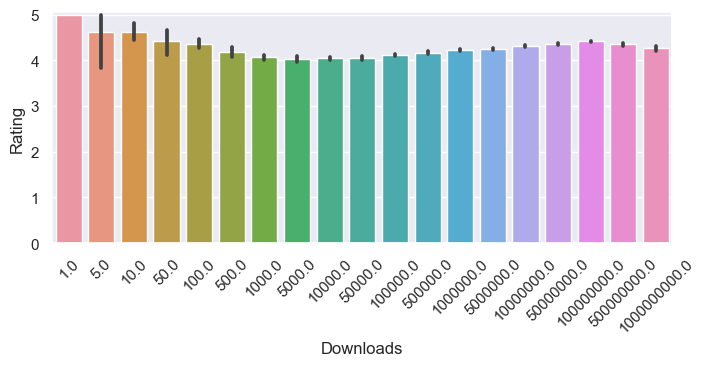

In [26]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 3)}) 
g = sns.barplot(
    x= 'Downloads',
    y= 'Rating',
    data=df
) 
sns.color_palette("hls", 8)
plt.xticks(rotation=45)
#g.invert_xaxis()
g.set(ylim=(0,5.05))

Despite looking fairly unremarkable, there are a few interesting things I noticed in this graph. 
In particular, it is that people are very generous with rating apps all round.
Firstly, apps with lower downloads were higher rated. I am almost certain that this is because of the fact that the sample size
was so small and so most apps with low downloads got 5* reviewed.
Due to the quantized nature of ratings, no one can rate an app between 4* and 5* so most people just proceed with a 5* rating.
I suppose people are lesser critical of these niche apps because these apps probably tend to perform very specific and specialized functions and so 
most users are just happy to find said app and if it performs the one function they need, they rate it 5*.
Alternatively there may just be the fact that people use popular apps more as they tend to have more utility, users are thus able to find flaws and so many 
may end up rating them lowly. Many of these apps are probably social media as well and so a bias likely plays into that.

### Number of reviews and ratings

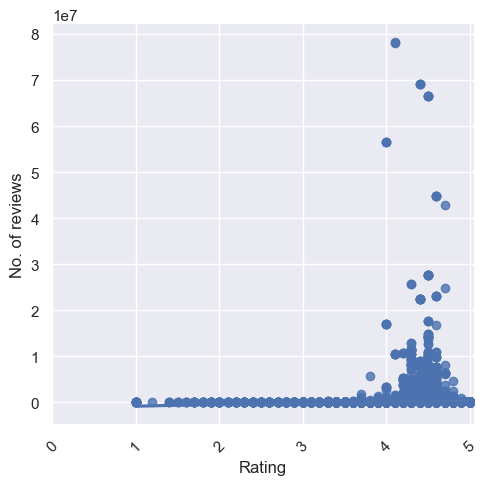

In [18]:
sns.set(rc={"figure.figsize":(25, 4)}) 
h = sns.lmplot(
    x= 'Rating',
    y= 'No. of reviews',
    data=df
) 
plt.xticks(rotation=45)
#h.invert_xaxis()
h.set(xlim=(0,5.05))

As illustrated above, we can once again observe the quantized nature of User ratings. 
When an app is rated 3 stars for example, the likelihood is that it is just one user who downloaded it and rated it 3 stars.
If more people download apps, the likelihood of the average rating being a decimal goes up exponentially.
As established, most people rate apps between 4-5* and so we can clearly see that this is where the bulk of the distribution takes place. With more users
reviewing apps, the more decimal like the average rating is.
This range is rather massive, notably being exponential in nature.

### Audience and Ratings

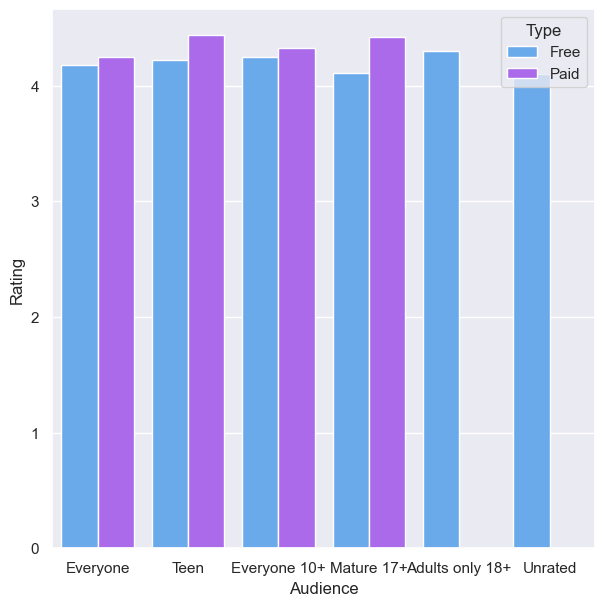

In [23]:
sns.set(rc={"figure.figsize":(7, 7)}) 
j = sns.barplot(
            x= 'Audience',
            y = 'Rating',
            hue = 'Type',
            data = df,
            errorbar=None,
            palette ='cool'
)
#j.set(xlabel="Rating and Size Distribution", title = "Rating and Size vs Installs")


As illustrated above, there is no substantial difference between Audience and average rating. This is fairly reasonable.
Most interestingly, the hue reveals that paid apps are infact higher rated generally speaking.
This is although fairly marginal. 
18+ apps and unrated apps also do not feature paid apps.

### General Heatmap 

Text(0.5, 1.0, 'Play Store Heatmap')

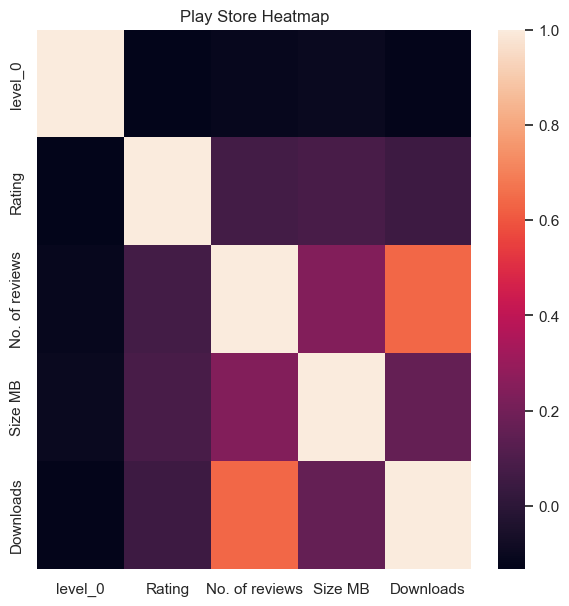

In [24]:
sns.set(rc={"figure.figsize":(7, 7)})
sns.set_palette("Paired")
corr= df.drop(['index'], axis = 1).corr()
k= sns.heatmap(
    corr
)
palette ='cool'
k.set_title("Play Store Heatmap")

This illustrates a general overview of my data. As can be seen, the most dense data series would be with number of reviews and downloads, 
There is not too much density between ratings and other attributes. 
I found this to be quite interesting as it does explain to a small extent the lack of an overwhelmingly strong data connecting average ratings and other aspects of my data.

### Size of an app and average reviews

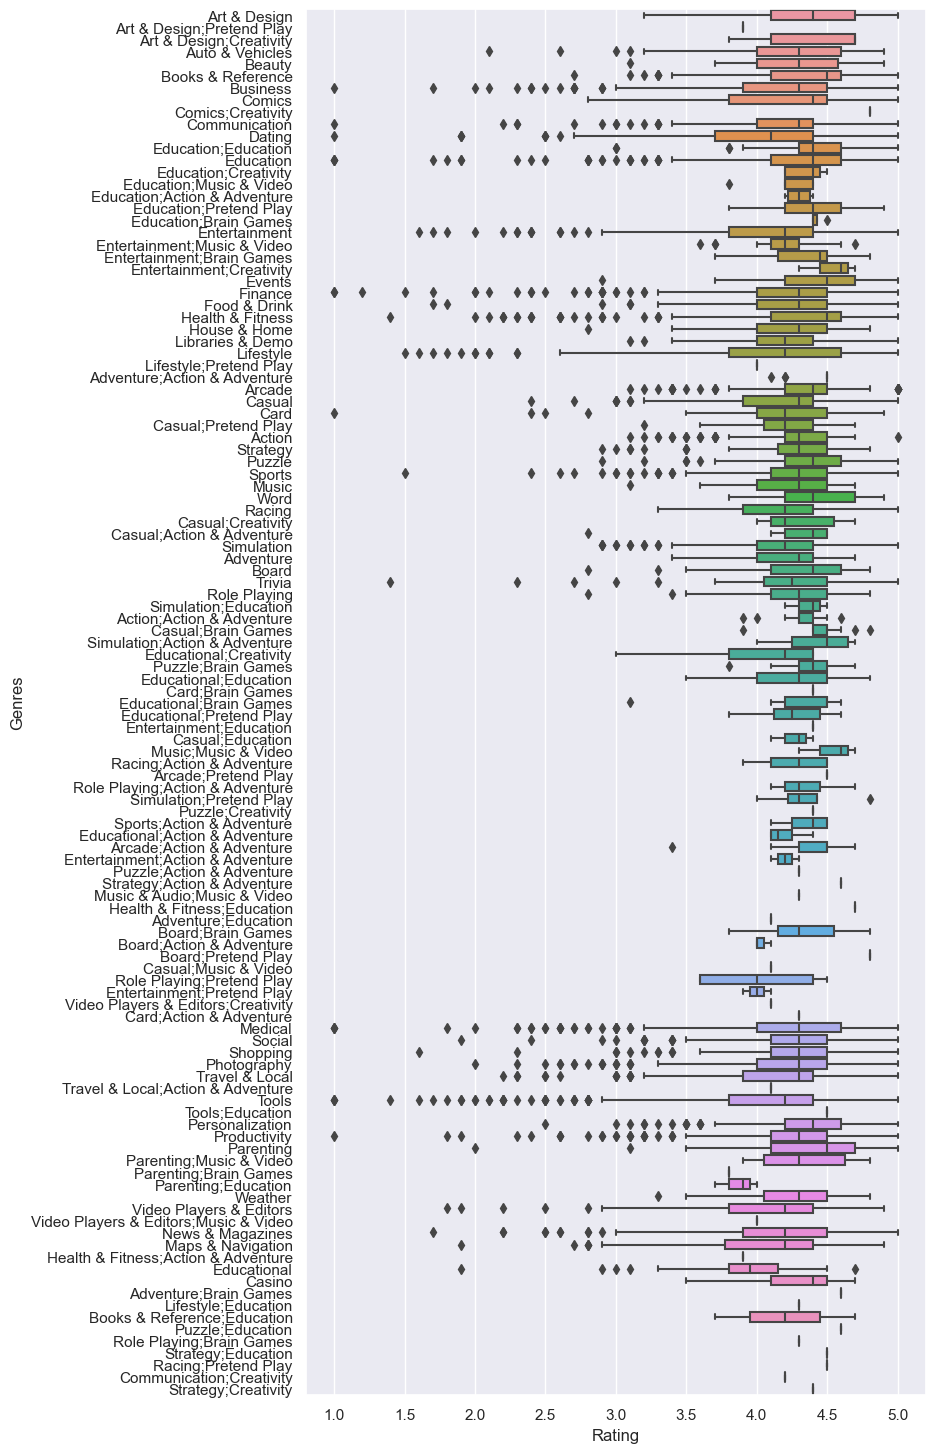

In [25]:
sns.set(rc={"figure.figsize":(8, 18)}) 
h = sns.boxplot(
    x= 'Rating',
    y= 'Genres',
    data=df,
) 
#h.invert_xaxis()

While it is tough to narrow down which genres in particular are the most highly rated, it is clear that there are some app categories which have alot more data entries than others.
This is likely to do with popularity.
The lowest rated categories were "parenting; education" and "Role PLaying;Pretend Play".
I notice that the lower rated apps and the higher rated apps both simultaneously have lesser spread or deviation. I think this may be because of them being a niche category and once again having lesser entries.

## Conclusion

After investigating alot of my data and how average rating relates to many other aspects of an app, a few observations can be made.

-Becuase of ratings being quantized, most people just rate apps very highly and opinions converge towards somewhere between an average of 4-5* rated apps.
This does become more pronounced when apps are more popularly downloaded.
Although while this average value is known to converge, curiously the deviation is more irregular in that it tends to be alot lesser on niche categories of apps such as those with few downloadsor of being a niche genre altogether. 

-On the whole, people have a large variety of responses to popular apps although predictably this aggregrates to the same rating of between 4-5* more or less.
This is contrast to niche apps which somehow have more people in united agreement of an app being either good or bad. 
Popular apps have an ambigius response from users.

-I have also learnt that ratings are also sort of imprecise and that it does not reveal as much information as I originally anticipated. 
Perhaps if ratings were not quantized, and people could rate decimals between 4*-5*, I suspect more people would vote in that range than a 5* straight away. This could then reveal more data
down the line.